In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler



In [58]:

# Cargar datos desde el CSV
data = pd.read_csv("Merge_Data_Limpio.csv")


C:\Users\prordija\AppData\Local\Temp\ipykernel_16168\3500214832.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Merge_Data_Limpio.csv")


In [59]:
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=["object"]).columns

In [60]:
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype('str'))

In [61]:

# Seleccionar las características (features) y la variable objetivo
features = data.drop(columns=["ACTIVE_CLIENT"])
target = data["ACTIVE_CLIENT"]


In [62]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [63]:

# Construir el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [64]:

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)


In [65]:

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)


In [66]:

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9999956627643112
Confusion Matrix:
 [[638636      5]
 [     0 514167]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    638641
           1       1.00      1.00      1.00    514167

    accuracy                           1.00   1152808
   macro avg       1.00      1.00      1.00   1152808
weighted avg       1.00      1.00      1.00   1152808



In [67]:
conf_matrix = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = conf_matrix.ravel()
churn_rate = (FN / (FN + TP))
print(f"Churn Rate: {churn_rate}")


Churn Rate: 0.0


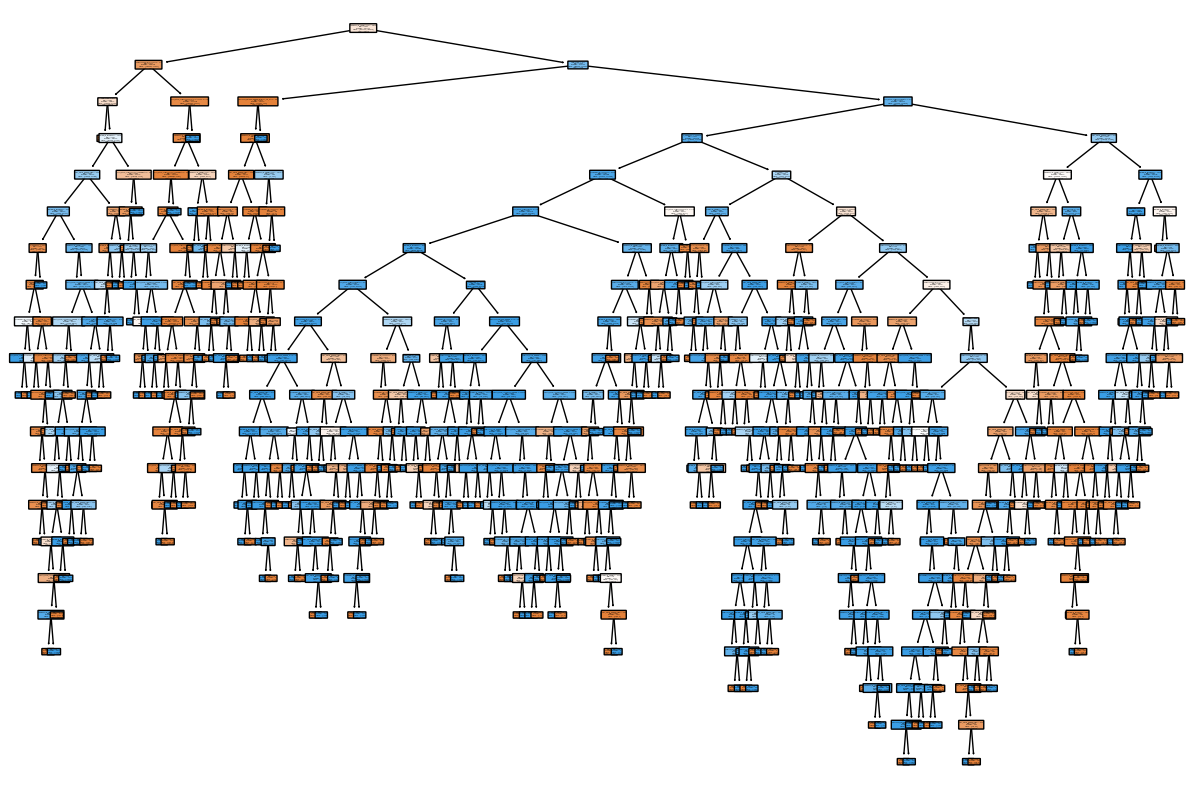

In [68]:

# Mostrar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=features.columns, class_names=["Inactive", "Active"], filled=True, rounded=True)
plt.show()
